# Steel Industry Energy Consumption

Dataset Link

https://archive.ics.uci.edu/ml/datasets/Steel+Industry+Energy+Consumption+Dataset#

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import set_config
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12.0, 9.0]
plt.rcParams['font.size'] = 12
set_config(display='diagram')                       # HTML representation of Pipeline (display diagram)
path = os.getcwd()                                  # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
file = os.path.join('datasets', 'Steel_industry_data.csv')
df = pd.read_csv(file)
df['date'] = pd.to_datetime(df['date'])                        # convert date column to pandas datetime

# Head and Tail

In [4]:
df

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,2018-12-31 23:00:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [5]:
df.shape

(35040, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   date                                  35040 non-null  datetime64[ns]
 1   Usage_kWh                             35040 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64       
 4   CO2(tCO2)                             35040 non-null  float64       
 5   Lagging_Current_Power_Factor          35040 non-null  float64       
 6   Leading_Current_Power_Factor          35040 non-null  float64       
 7   NSM                                   35040 non-null  int64         
 8   WeekStatus                            35040 non-null  object        
 9   Day_of_week                           35040 non-null  object        
 10

In [7]:
df.describe(include=np.number)

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [8]:
df.describe(include='object')

,WeekStatus,Day_of_week,Load_Type
count,35040,35040,35040
unique,2,7,3
top,Weekday,Monday,Light_Load
freq,25056,5088,18072


In [9]:
df['date'].unique()

array(['2018-01-01T00:15:00.000000000', '2018-01-01T00:30:00.000000000',
       '2018-01-01T00:45:00.000000000', ...,
       '2018-12-31T23:30:00.000000000', '2018-12-31T23:45:00.000000000',
       '2018-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [10]:
df['WeekStatus'].value_counts()

Weekday    25056
Weekend     9984
Name: WeekStatus, dtype: int64

In [11]:
df['Day_of_week'].value_counts()

Monday       5088
Tuesday      4992
Wednesday    4992
Thursday     4992
Friday       4992
Saturday     4992
Sunday       4992
Name: Day_of_week, dtype: int64

In [12]:
df['Load_Type'].value_counts()

Light_Load      18072
Medium_Load      9696
Maximum_Load     7272
Name: Load_Type, dtype: int64

# Exploratory Data Analysis

Date Resampled By Week

In [13]:
df_byweek = df.set_index('date').resample('1W').sum()
df_byweek.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
date,,,,,,,
2018-01-07,11067.34,5112.33,4782.56,4.26,55352.23,46887.44,28728000
2018-01-14,11584.74,5158.36,3898.51,4.36,54984.45,52448.32,28728000
2018-01-21,32223.91,14863.69,2268.56,14.58,58569.84,60782.10,28728000
2018-01-28,29016.71,13247.56,2182.75,13.16,59060.83,61991.69,28728000
2018-02-04,30650.83,11615.23,1329.69,11.84,57761.51,64308.95,28728000


In [14]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def thousand(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

format_tsd = FuncFormatter(thousand)

# line plot helper function
def plot_line(df, x, y, xlabel=None, ylabel=None, title=None):

    # Initialize the matplot figure
    fig, ax = plt.subplots()
    fig.autofmt_xdate()

    # plot line chart
    sns.lineplot(
        x=x, y=y, 
        data=df, ax=ax
    )

    # matplotlib axis label
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # set y-axis major formatter
    ax.yaxis.set_major_formatter(format_tsd)

    return plot_line

<function __main__.plot_line(df, x, y, xlabel=None, ylabel=None, title=None)>

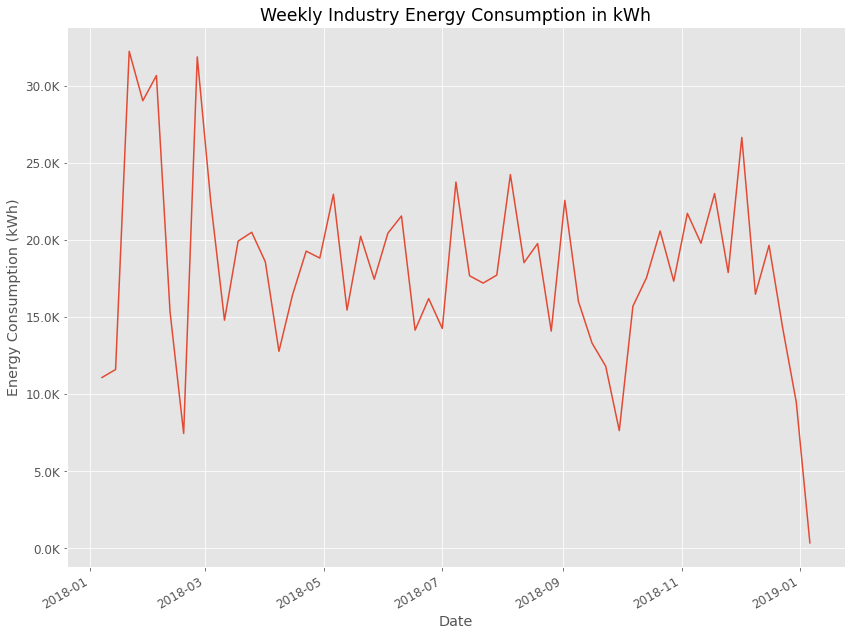

In [15]:
plot_line(
    df=df_byweek, 
    x='date', y='Usage_kWh',
    xlabel='Date', ylabel='Energy Consumption (kWh)', 
    title='Weekly Industry Energy Consumption in kWh'
)

<function __main__.plot_line(df, x, y, xlabel=None, ylabel=None, title=None)>

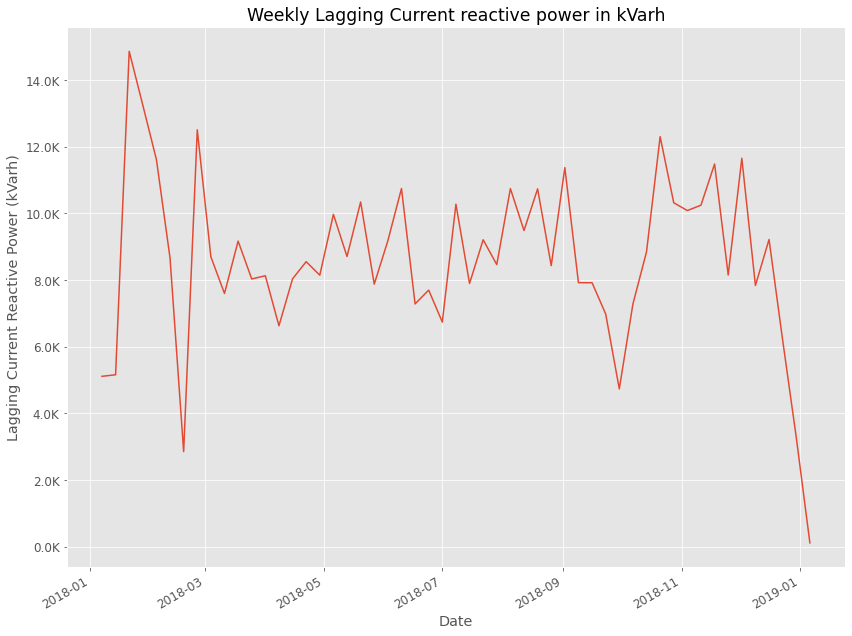

In [16]:
plot_line(
    df=df_byweek, 
    x='date', y='Lagging_Current_Reactive.Power_kVarh',
    xlabel='Date', ylabel='Lagging Current Reactive Power (kVarh)', 
    title='Weekly Lagging Current reactive power in kVarh'
)

<function __main__.plot_line(df, x, y, xlabel=None, ylabel=None, title=None)>

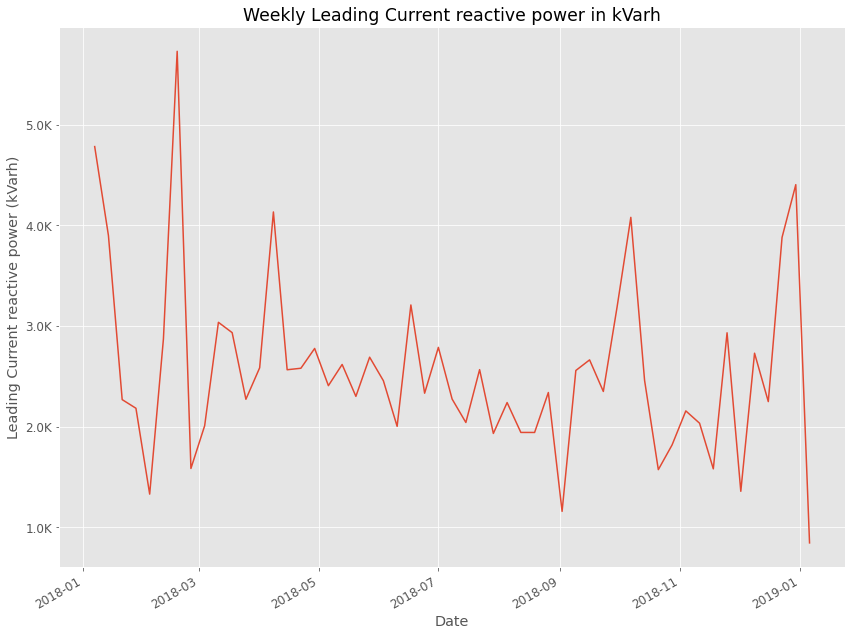

In [17]:
plot_line(
    df=df_byweek, 
    x='date', y='Leading_Current_Reactive_Power_kVarh',
    xlabel='Date', ylabel='Leading Current reactive power (kVarh)', 
    title='Weekly Leading Current reactive power in kVarh'
)

[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'tCO2 (CO2) in ppm'),
 Text(0.5, 1.0, 'Weekly tCO2 (CO2) in ppm')]

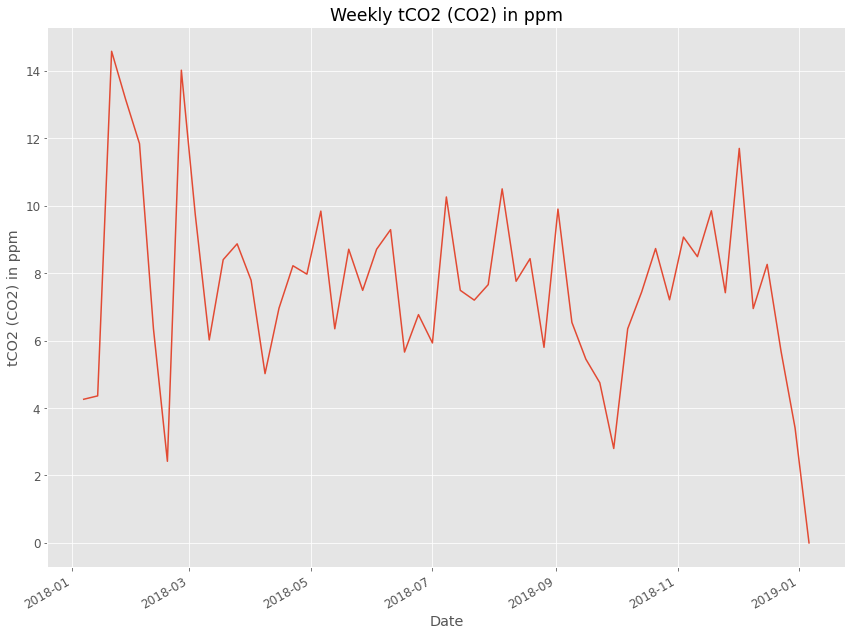

In [18]:
# initiate matplot figure
fig1, ax1 = plt.subplots()
fig1.autofmt_xdate()

# plot line 
sns.lineplot(
    x=df_byweek['CO2(tCO2)'].keys(), y=df_byweek['CO2(tCO2)'].values,
    ax=ax1
)

# label x and y axis
ax1.set(xlabel='Date', ylabel='tCO2 (CO2) in ppm', title='Weekly tCO2 (CO2) in ppm')

<function __main__.plot_line(df, x, y, xlabel=None, ylabel=None, title=None)>

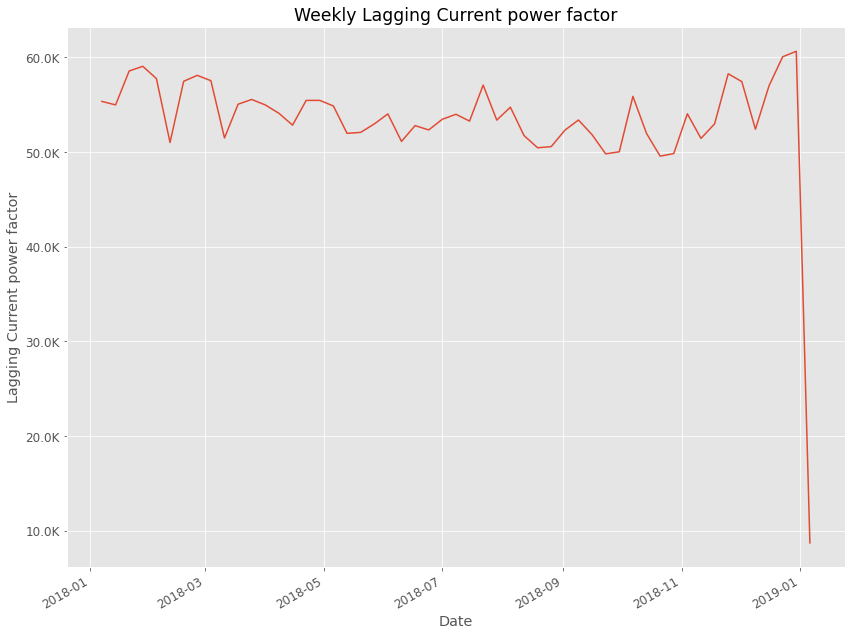

In [19]:
plot_line(
    df=df_byweek, 
    x='date', y='Lagging_Current_Power_Factor',
    xlabel='Date', ylabel='Lagging Current power factor', 
    title='Weekly Lagging Current power factor'
)

<function __main__.plot_line(df, x, y, xlabel=None, ylabel=None, title=None)>

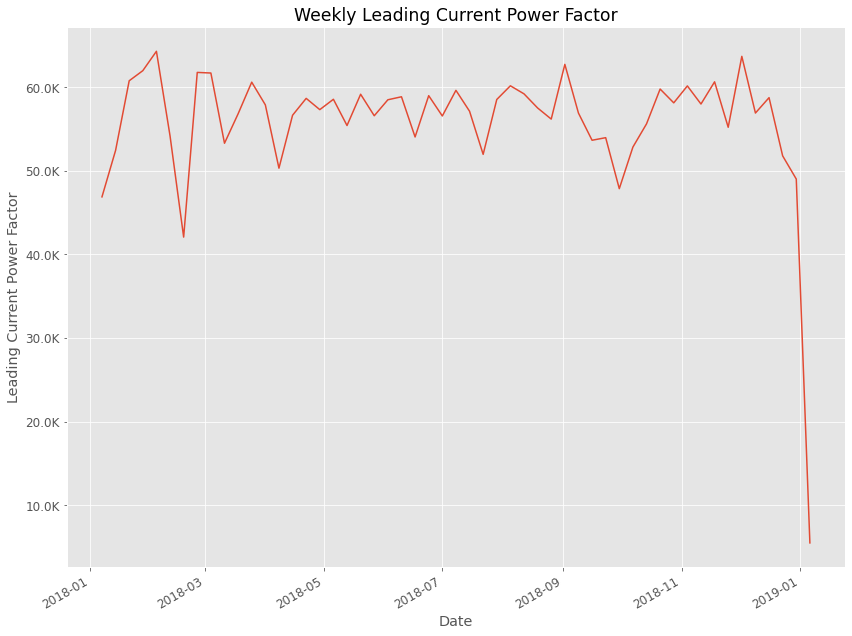

In [20]:
plot_line(
    df=df_byweek, 
    x='date', y='Leading_Current_Power_Factor',
    xlabel='Date', ylabel='Leading Current Power Factor', 
    title='Weekly Leading Current Power Factor'
)

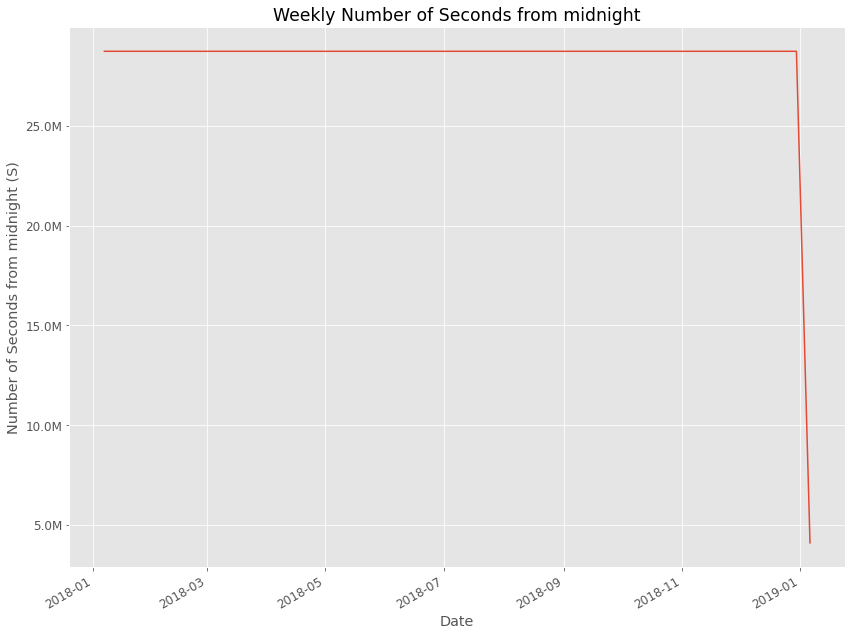

In [21]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)

# initiate matplot figure
fig2, ax2 = plt.subplots()
fig2.autofmt_xdate()

# plot line 
sns.lineplot(
    x=df_byweek['NSM'].keys(), y=df_byweek['NSM'].values,
    ax=ax2
)

# label x and y axis
ax2.set(xlabel='Date', ylabel='Number of Seconds from midnight (S)', title='Weekly Number of Seconds from midnight')

# set y-axis major formatter
ax2.yaxis.set_major_formatter(format_mill)

In [22]:
def plot_bar(x, y, xlabel=None, ylabel=None, title=None):

    # initialize matplot figure
    fig3, ax3 = plt.subplots()

    # plot bar chart
    sns.barplot(
        x=x.value_counts().keys(), y=y.value_counts().values,
        ci=None, ax=ax3
    )

    # lable plot axis
    ax3.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # despine x and y axis
    sns.despine(bottom=True, left=True)

    # set y-axis major formatter
    ax3.yaxis.set_major_formatter(format_tsd)

    return plot_bar

<function __main__.plot_bar(x, y, xlabel=None, ylabel=None, title=None)>

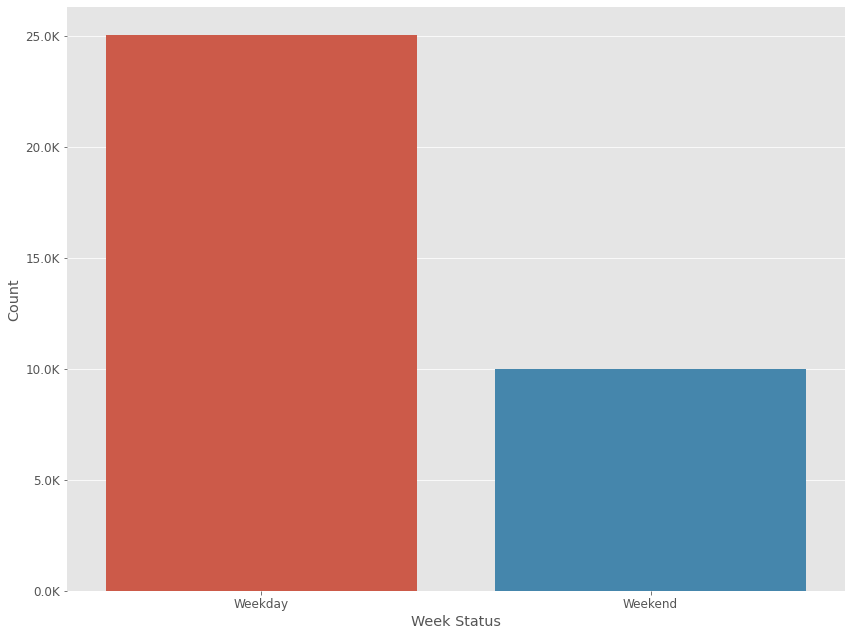

In [23]:
plot_bar(x=df['WeekStatus'], y=df['WeekStatus'], xlabel='Week Status', ylabel='Count')

<function __main__.plot_bar(x, y, xlabel=None, ylabel=None, title=None)>

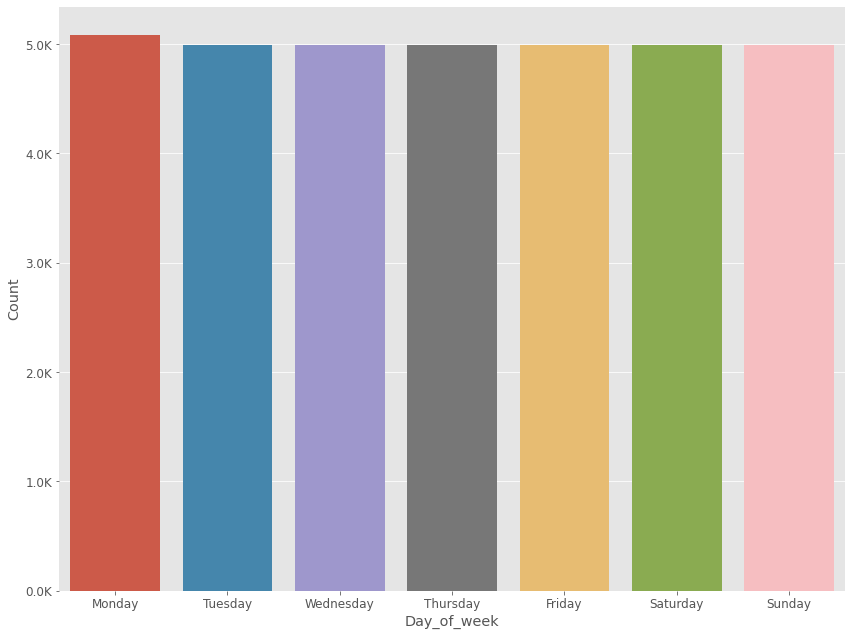

In [24]:
plot_bar(x=df['Day_of_week'], y=df['Day_of_week'], xlabel='Day_of_week', ylabel='Count')

<function __main__.plot_bar(x, y, xlabel=None, ylabel=None, title=None)>

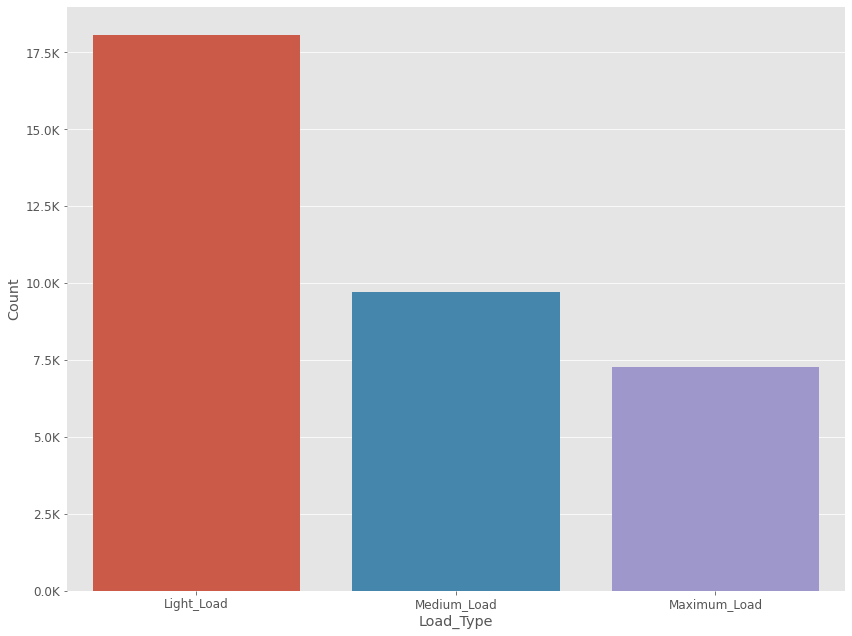

In [25]:
plot_bar(x=df['Load_Type'], y=df['Load_Type'], xlabel='Load_Type', ylabel='Count')